# 素数判定あれこれ

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *
from decimal import *
getcontext()
import random

## 素朴な素数判定

In [2]:
def is_prime(num):
    for k in range(2, int(math.sqrt(num))+1):
        if num%k == 0:
            return False
            break
    else: return True

## フェルマー法

In [41]:
def fermat(num):
    num = abs(num)
    if num == 2:
        return True
    elif num < 2 or num%2 == 0:
        return False
    else:
        return pow(2, num-1, num) == 1

In [ ]:
fermat((2**20)*13+1)

## ミラー・ラビン法

In [34]:
def miller_rabin(k,init):
    num = (2**k)*init+1
    a = random.randrange(num-2)+1
    if pow(a, init, num) ==1: #(a**init)%num == 1:
        return True
    else:
        for r in range(k):
            b = (2**r)*init
            if pow(a, b, num) == num-1: #(a**b)%num == num-1:
                return True
                break
        else: 
            return False

In [ ]:
k=20
init=13
num = (2**k)*init+1
print(num)

print(miller_rabin(k,init),is_prime(num))

In [ ]:
init=13
%timeit [is_prime((2**k)*init+1) for k in range(1,100)]
%timeit [fermat((2**k)*init+1) for k in range(1,100)]
%timeit [miller_rabin(k,init) for k in range(1,100)]

# 大竹先生の問題

任意の奇素数 $p$ に対し、$p-1$ は偶数であり、$k \in \mathbb{N}$ と奇数 $M$ が存在して、
$$ p-1 = 2^{k}M $$
と分解される。

この逆を考える。
つまり、以下の問題を考える。

>**問題.** すべての奇数 $M$ に対し、$2^{k}*M + 1$ が素数となるような $k \in \mathbb{N}$ が存在するか?

https://ja.wikipedia.org/wiki/シェルピンスキー数

In [33]:
M = 2*random.randint(1,500)-1; print(M)

Limit = 10**2
power=0
num = M
while not is_prime(num+1):
    power += 1
    if power > Limit:
        print("Reach the limit")
        break
    num *= 2
else:
    print("{}=2^{}*{}+1 is a prime.".format(num+1, count, M))

283
303868936193=2^6*283+1 is a prime.


## グラフ表示

In [ ]:
def get_k(odd, Limit = 10**3):
    count = 0
    num = odd
    while not fermat(num+1): #is_prime(num+1):
        count += 1
        if count > Limit:
            return -1
            break
        num *= 2
    else:
        return count

In [35]:
def get_k_mr(odd, Limit = 10**3):
    count = 0
    while not miller_rabin(count, odd):
        count += 1
        if count > Limit:
            return -1
            break
    else:
        return count

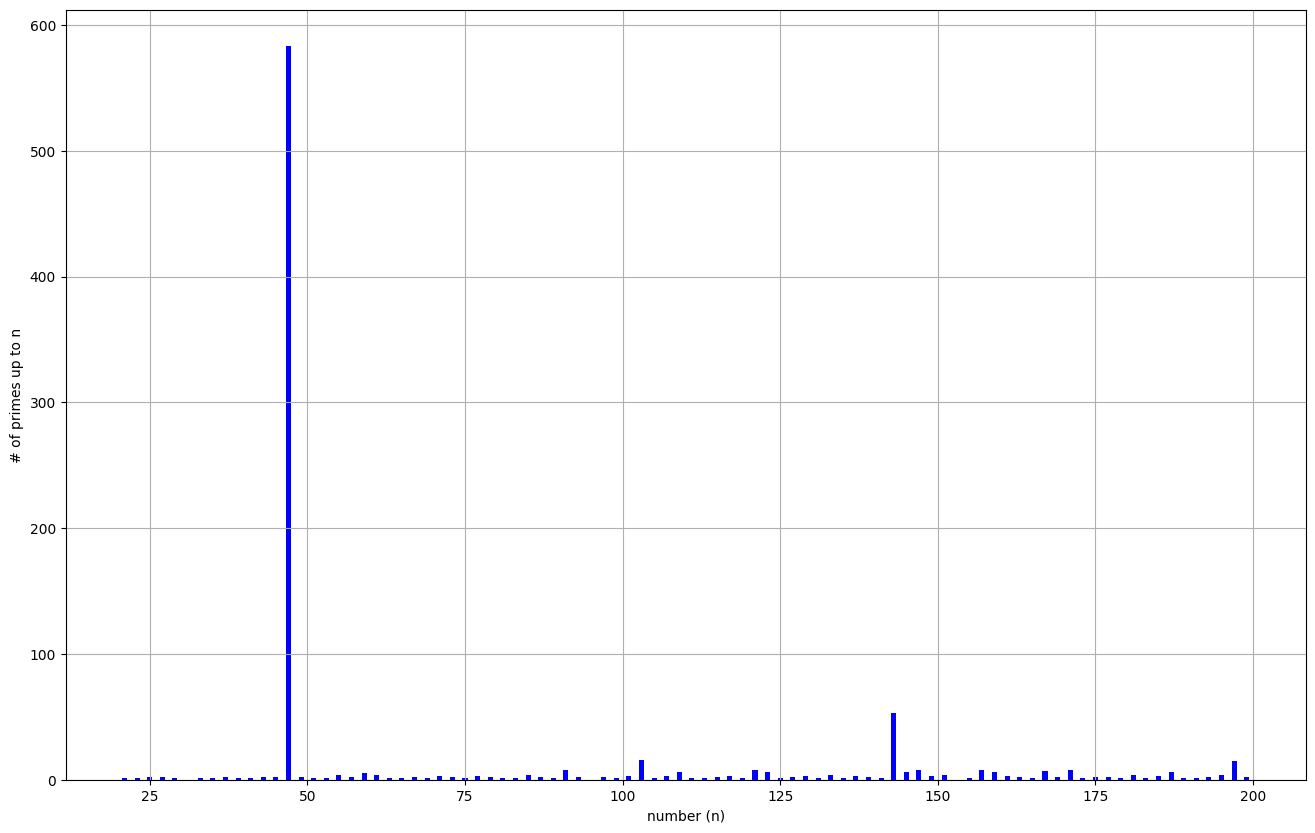

In [51]:
X = [2*k-1 for k in range(1,10**4)][10:100]
Y = [get_k_mr(odd) for odd in X] #[get_k(odd) for odd in X]

# Make the plot
plt.figure(figsize=(16,10))

ax = plt.subplot()
ax.grid()
ax.set(xlabel='number (n)', ylabel='# of primes up to n')

plt.bar(X, Y, color='blue')
#plt.xticks(X)
plt.show()

In [37]:
get_k_mr(47)

583

In [38]:
print((2**583)*47+1)
miller_rabin(583,47)

1487939695262196876907983166454197495251350196192890428923003345454869706240895712896623468784438158657419591298913094265537812046389415279164757669092989298186306341246574002177


True

## 改良

In [44]:
def get_k_hybrid(odd, Limit = 10**5):
    count = 0
    num = odd
    num_is_prime = False
    while not num_is_prime:
        count += 1
        if count > Limit:
            return -1
            break
        num = (2**count)*odd + 1
        if fermat(num):
            num_is_prime = miller_rabin(count, odd)
    else:
        return count

In [45]:
for n in range(400,500):
    odd = 2*n+1
    print("{} |-> {}".format(odd, get_k_hybrid(odd)))

801 |-> 5
803 |-> 1
805 |-> 2
807 |-> 2
809 |-> 1
811 |-> 16
813 |-> 1
815 |-> 3
817 |-> 6
819 |-> 3
821 |-> 3
823 |-> 6
825 |-> 2
827 |-> 19
829 |-> 18
831 |-> 1
833 |-> 1
835 |-> 6
837 |-> 6
839 |-> 5
841 |-> 4
843 |-> 2
845 |-> 3
847 |-> 2
849 |-> 1
851 |-> 7
853 |-> 2
855 |-> 3
857 |-> 3
859 |-> 10
861 |-> 1
863 |-> 5
865 |-> 2
867 |-> 2
869 |-> 5
871 |-> 8
873 |-> 1
875 |-> 3
877 |-> 4
879 |-> 1
881 |-> 1027
883 |-> 2
885 |-> 2
887 |-> 7
889 |-> 2
891 |-> 1
893 |-> 1
895 |-> 2
897 |-> 3
899 |-> 3
901 |-> 12
903 |-> 2
905 |-> 1
907 |-> 6
909 |-> 2
911 |-> 1
913 |-> 18
915 |-> 1
917 |-> 27
919 |-> 2
921 |-> 3
923 |-> 1
925 |-> 2
927 |-> 2
929 |-> 3
931 |-> 4
933 |-> 1
935 |-> 1
937 |-> 8
939 |-> 1
941 |-> 3
943 |-> 6
945 |-> 3
947 |-> 3
949 |-> 2
951 |-> 4
953 |-> 1
955 |-> 2
957 |-> 4
959 |-> 3
961 |-> 4
963 |-> 2
965 |-> 1
967 |-> 4
969 |-> 2
971 |-> 9
973 |-> 4
975 |-> 1
977 |-> 3
979 |-> 2
981 |-> 5
983 |-> 9
985 |-> 4
987 |-> 7
989 |-> 1
991 |-> 16
993 |-> 1
995 |-> 9
997 |-> 2

In [ ]:
num = (2**3)*161+1
print(num)
is_prime(num)

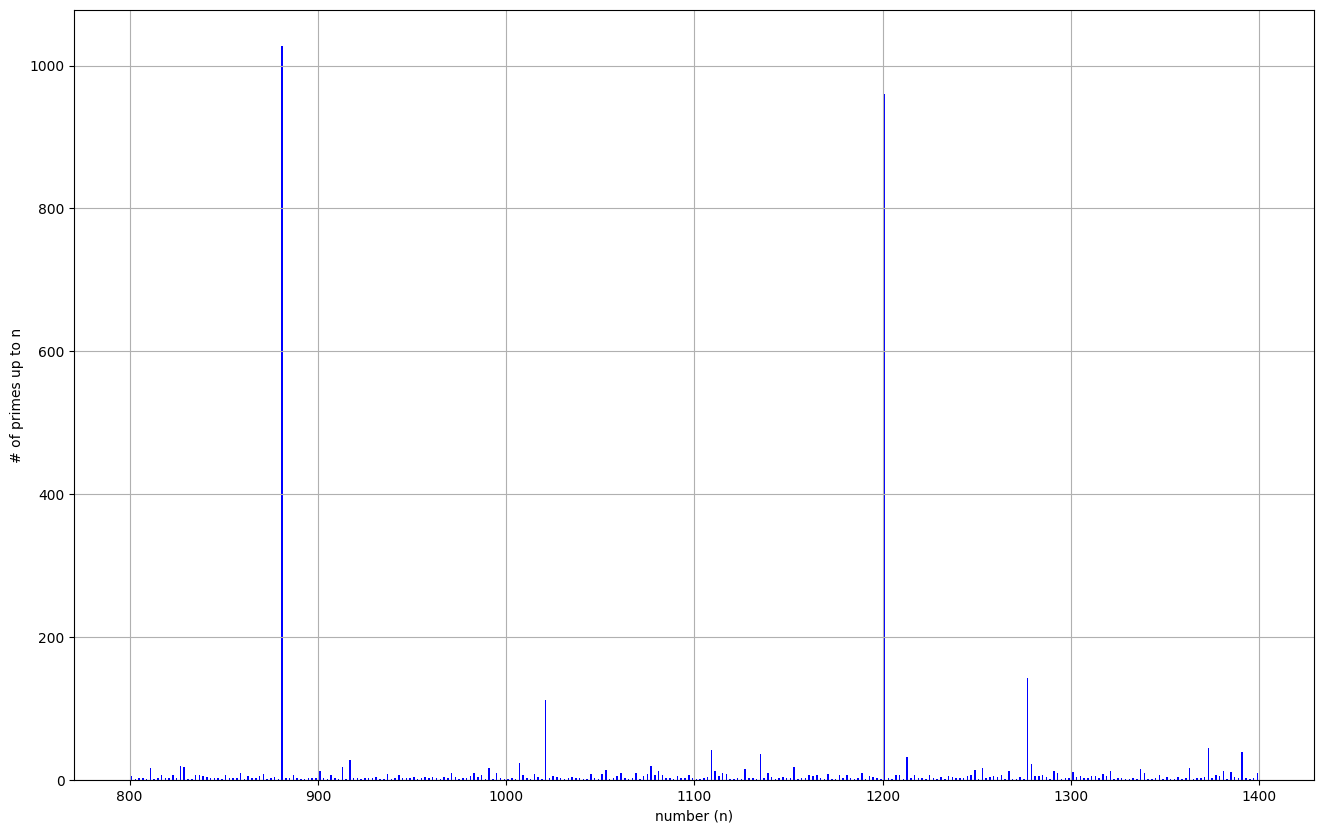

In [47]:
X = [2*k-1 for k in range(1,10**4)][400:700] #[1:1000]
Y = [get_k_hybrid(odd) for odd in X] #[get_k(odd) for odd in X]

# Make the plot
plt.figure(figsize=(16,10))

ax = plt.subplot()
ax.grid()
ax.set(xlabel='number (n)', ylabel='# of primes up to n')

plt.bar(X, Y, color='blue')
#plt.xticks(X)
plt.show()